## 1. Understand the dataset:

#### 1.1Import the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Service_Requests_from_2010_to_Present.csv')

#### 1.2Visualize the dataset

In [33]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed,Time Elapsed (hours),Time Elapsed (seconds),Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,0.925000,3330.0,0.925000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,1.453611,5233.0,1.453611
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,4.859444,17494.0,4.859444
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27,7.757500,27927.0,7.757500
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44,3.462222,12464.0,3.462222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",0 days 10:17:47,10.296389,37067.0,10.296389
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",0 days 02:20:34,2.342778,8434.0,2.342778
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",0 days 00:19:03,0.317500,1143.0,0.317500
364556,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",0 days 02:40:53,2.681389,9653.0,2.681389


#### 1.3Print the columns of the DataFrame

In [3]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

#### 1.4Identify the shape of the dataset

In [4]:
df.shape

(364558, 53)

#### 1.5 Identify the variables with null values

In [4]:
df.isnull().mean()*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

## 2. Perform basic data exploratory analysis:

#### 2.1Draw a frequency plot to show the number of null values in each column of the DataFrame

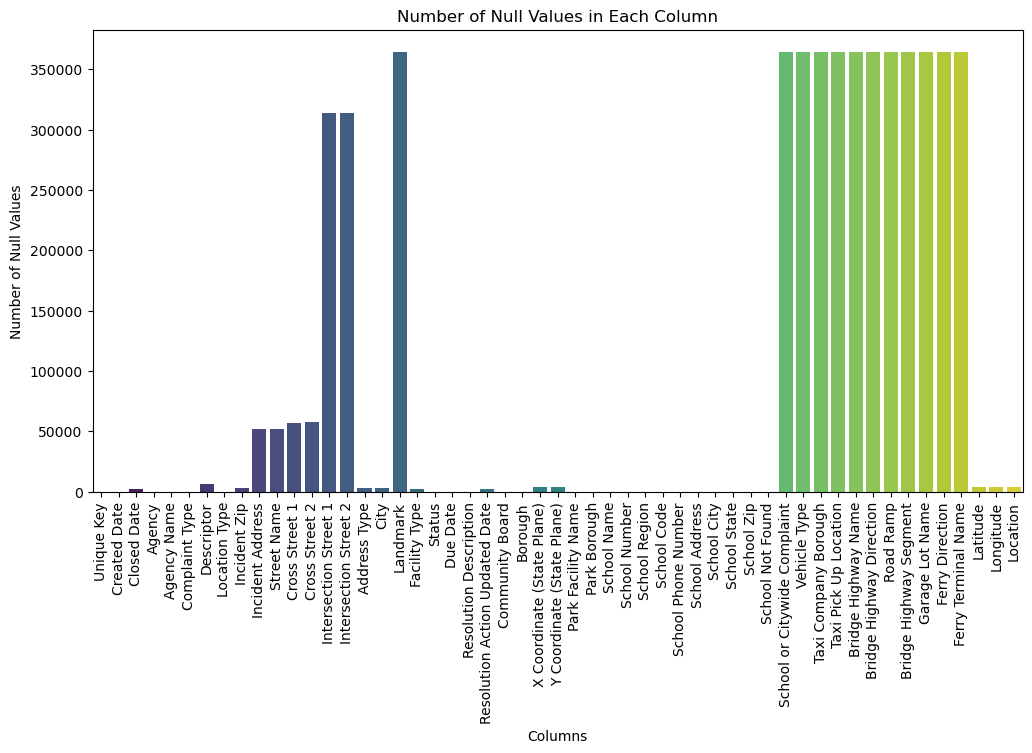

In [5]:

null_counts = df.isnull().sum()


plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in Each Column')
plt.show()


### 2.2Missing value treatment

#### 2.2.1Remove the records whose Closed Date values are null

In [6]:
df = df.dropna(subset=['Closed Date'])


In [7]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

df = df[df['Created Date'] <= df['Closed Date']]


### 2.3Analyze the date column,and remove entries that have an incorrect timeline

In [8]:
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')

df.dropna(subset=['Created Date', 'Closed Date'], inplace=True)

if 'Closed Date' in df.columns:
    df = df[df['Created Date'] <= df['Closed Date']]


df.reset_index(drop=True, inplace=True)


#### 2.3.1Calculate the time elapsed in closed and creation date

In [9]:
df['Time Elapsed'] = df['Closed Date'] - df['Created Date']


df['Time Elapsed (hours)'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600


In [10]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed,Time Elapsed (hours)
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,0.925000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,1.453611
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,4.859444
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27,7.757500
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44,3.462222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362172,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",0 days 10:17:47,10.296389
362173,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",0 days 02:20:34,2.342778
362174,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",0 days 00:19:03,0.317500
362175,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",0 days 02:40:53,2.681389


#### Convert the calculated date to seconds to get a better representation

In [12]:
df['Time Elapsed (seconds)'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()



In [32]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed,Time Elapsed (hours),Time Elapsed (seconds)
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,0.925000,3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,1.453611,5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,4.859444,17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27,7.757500,27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44,3.462222,12464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",0 days 10:17:47,10.296389,37067.0
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",0 days 02:20:34,2.342778,8434.0
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",0 days 00:19:03,0.317500,1143.0
364556,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",0 days 02:40:53,2.681389,9653.0


#### 2.3.3View the descriptive statistics for the newly created column

In [13]:
statistics = df['Time Elapsed (seconds)'].describe()


print(statistics)


count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Time Elapsed (seconds), dtype: float64


#### 2.3.4Check the number of null values in the Complaint_Type and City columns

In [14]:
complaint_type_null_count = df['Complaint Type'].isnull().sum()
city_null_count = df['City'].isnull().sum()

print("Number of null values in 'Complaint_Type':", complaint_type_null_count)
print("Number of null values in 'City':", city_null_count)


Number of null values in 'Complaint_Type': 0
Number of null values in 'City': 674


#### 2.3.5Impute the NA value with Unknown City

In [15]:
df['City'].fillna("Unknown City", inplace=True)




#### 2.3.6Draw a frequency plot for the complaints in each city

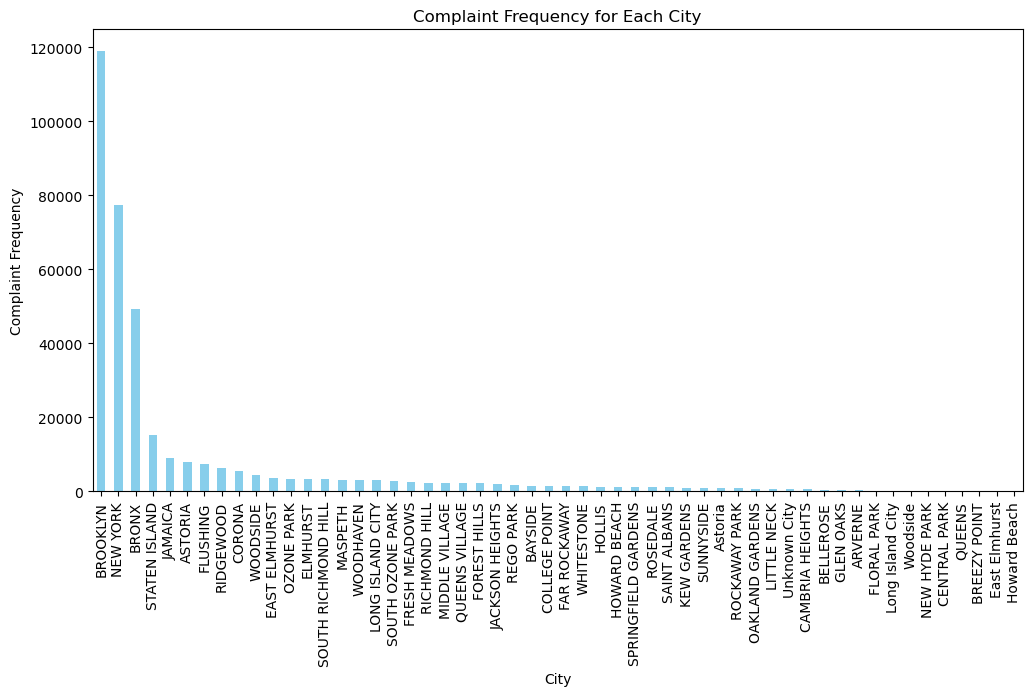

In [16]:
complaints_by_city = df['City'].value_counts()


plt.figure(figsize=(12, 6))
complaints_by_city.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Complaint Frequency')
plt.title('Complaint Frequency for Each City')
plt.xticks(rotation=90)
plt.show()


#### 2.3.7Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

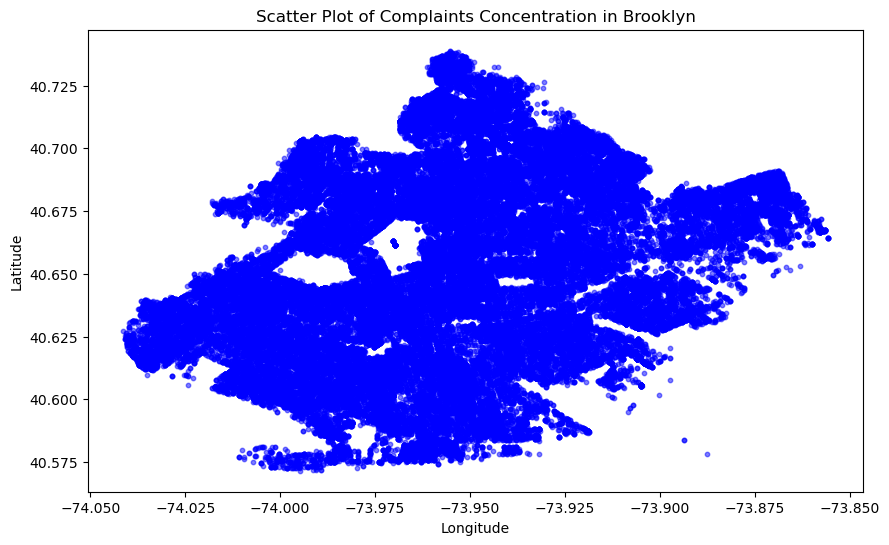

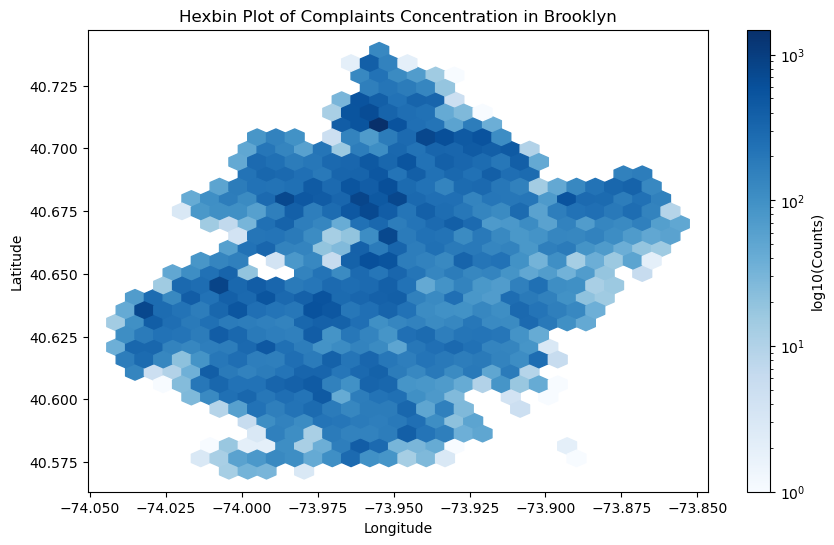

In [17]:
brooklyn_df = df[df['Borough'] == 'BROOKLYN']


plt.figure(figsize=(10, 6))
plt.scatter(brooklyn_df['Longitude'], brooklyn_df['Latitude'], alpha=0.5, s=10, color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Complaints Concentration in Brooklyn')
plt.show()


plt.figure(figsize=(10, 6))
plt.hexbin(brooklyn_df['Longitude'], brooklyn_df['Latitude'], gridsize=30, cmap='Blues', bins='log', mincnt=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Complaints Concentration in Brooklyn')
plt.colorbar(label='log10(Counts)')
plt.show()


#### 3.1Plot a bar graph to show the types of complaints

In [43]:
df['Complaint Type'].value_counts()

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint Type, dtype: int64

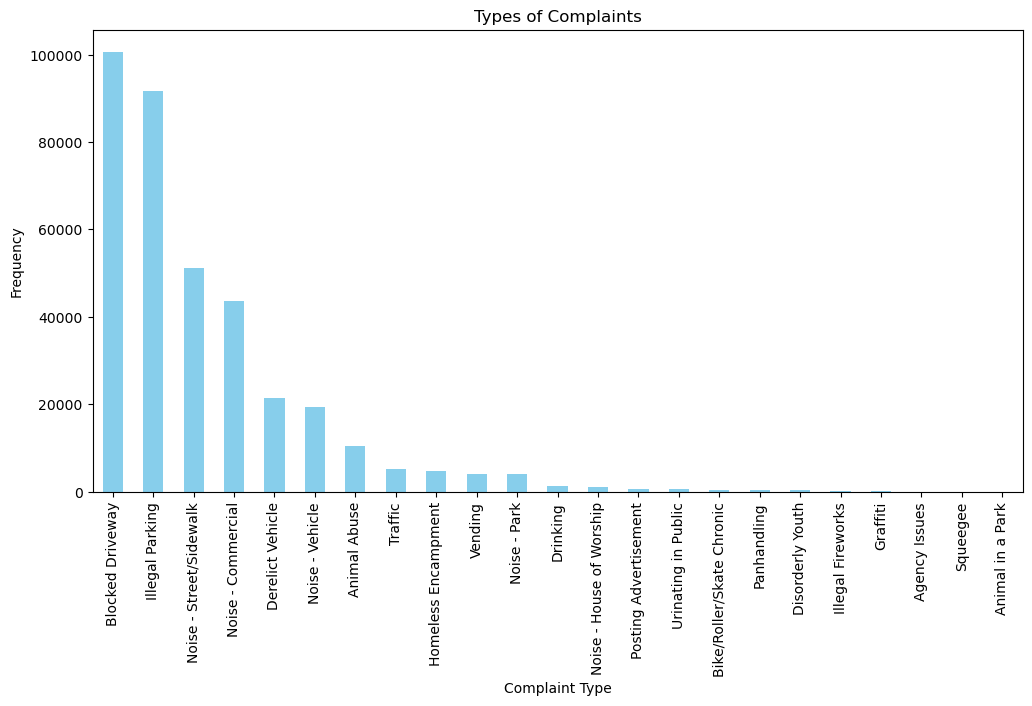

In [18]:
complaints_by_type = df['Complaint Type'].value_counts()

plt.figure(figsize=(12, 6))
complaints_by_type.plot(kind='bar', color='skyblue')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.title('Types of Complaints')
plt.xticks(rotation=90)
plt.show()


#### 3.2Check the frequency of various types of complaints for New York City

In [19]:
nyc_df = df[df['City'] == 'NEW YORK']

complaints_by_type_nyc = nyc_df['Complaint Type'].value_counts()

print(complaints_by_type_nyc)


Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64


#### 3.3Find the top 10 complaint types

In [20]:
complaint_types_freq = df['Complaint Type'].value_counts()

top_10_complaint_types = complaint_types_freq.head(10)

print(top_10_complaint_types)


Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64


#### 3.4Display the various types of complaints in each city

In [21]:
complaints_by_city_and_type = df.groupby(['City', 'Complaint Type']).size()

complaints_by_city_and_type = complaints_by_city_and_type.reset_index(name='Count')

print(complaints_by_city_and_type)


         City           Complaint Type  Count
0     ARVERNE             Animal Abuse     46
1     ARVERNE         Blocked Driveway     50
2     ARVERNE         Derelict Vehicle     32
3     ARVERNE         Disorderly Youth      2
4     ARVERNE                 Drinking      1
..        ...                      ...    ...
787  Woodside         Blocked Driveway     27
788  Woodside         Derelict Vehicle      8
789  Woodside          Illegal Parking    124
790  Woodside       Noise - Commercial      2
791  Woodside  Noise - Street/Sidewalk      5

[792 rows x 3 columns]


#### 3.5Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [48]:
df_new = df.pivot_table(index='Complaint Type', columns='City', aggfunc='size', fill_value=0)

print(df_new)

City                       ARVERNE  ASTORIA  Astoria  BAYSIDE  BELLEROSE  \
Complaint Type                                                             
Agency Issues                    0        0        0        0          0   
Animal Abuse                    46      170        0       53         15   
Animal in a Park                 0        0        0        0          0   
Bike/Roller/Skate Chronic        0       16        0        0          1   
Blocked Driveway                50     3436      159      514        138   
Derelict Vehicle                32      426       14      231        120   
Disorderly Youth                 2        5        0        2          2   
Drinking                         1       43        0        1          1   
Graffiti                         1        4        0        3          0   
Homeless Encampment              4       32        0        2          1   
Illegal Fireworks                0        4        0        0          1   
Illegal Park

## Visualize the major types of complaints in each city

#### 4.1Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

<Axes: xlabel='City'>

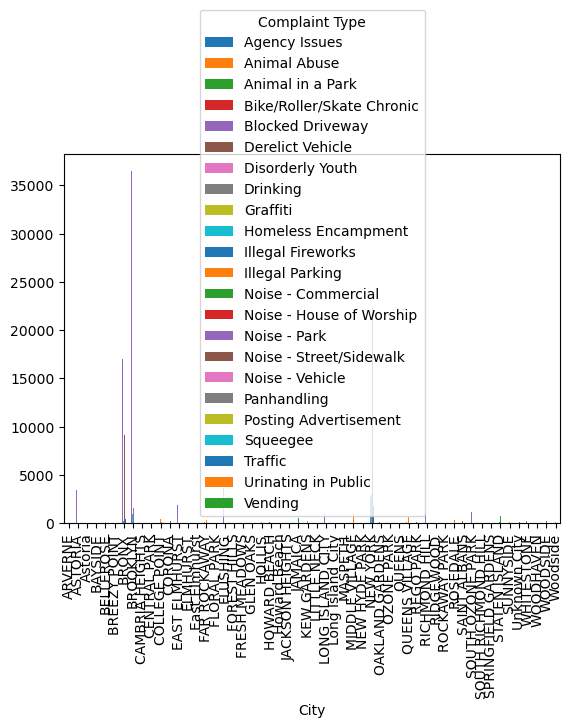

In [49]:
complaints_by_city_and_type = df.groupby(['City', 'Complaint Type']).size().unstack(fill_value=0)
complaints_by_city_and_type.plot.bar()

#### 4.2Sort the complaint types based on the average Request_Closing_Time grouping them for different locations

In [50]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600  

complaints_by_type_and_location = df.groupby(['Complaint Type', 'City'])['Request_Closing_Time'].mean().reset_index()

sorted_complaints = complaints_by_type_and_location.sort_values(by='Request_Closing_Time')

print(sorted_complaints)


                Complaint Type                 City  Request_Closing_Time
213                   Drinking              ARVERNE              0.238611
666      Posting Advertisement            RIDGEWOOD              0.248611
54   Bike/Roller/Skate Chronic        EAST ELMHURST              0.252222
338          Illegal Fireworks           OZONE PARK              0.330833
739        Urinating in Public               QUEENS              0.340556
..                         ...                  ...                   ...
307        Homeless Encampment      OAKLAND GARDENS             28.654444
70   Bike/Roller/Skate Chronic  SOUTH RICHMOND HILL             30.910278
286        Homeless Encampment            BELLEROSE             39.147222
273                   Graffiti       QUEENS VILLAGE             53.331944
49            Animal in a Park               QUEENS            336.842778

[792 rows x 3 columns]


## See whether the average response time across different complaint types is similar (overall)

In [22]:
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600  # in hours

overall_average_response_time = df['Request_Closing_Time'].mean()

average_response_time_by_complaint = df.groupby('Complaint Type')['Request_Closing_Time'].mean()

print("Overall Average Response Time: {:.2f} hours".format(overall_average_response_time))
print("\nAverage Response Time by Complaint Type:")
print(average_response_time_by_complaint)


Overall Average Response Time: 4.20 hours

Average Response Time by Complaint Type:
Complaint Type
Agency Issues                  5.080312
Animal Abuse                   5.009043
Animal in a Park             336.842778
Bike/Roller/Skate Chronic      3.645469
Blocked Driveway               4.509034
Derelict Vehicle               7.044333
Disorderly Youth               3.434375
Drinking                       3.839250
Graffiti                       6.465651
Homeless Encampment            4.292051
Illegal Fireworks              2.809301
Illegal Parking                4.347343
Noise - Commercial             3.079378
Noise - House of Worship       3.164191
Noise - Park                   3.396127
Noise - Street/Sidewalk        3.397582
Noise - Vehicle                3.489389
Panhandling                    4.403764
Posting Advertisement          2.023960
Squeegee                       4.044514
Traffic                        3.419200
Urinating in Public            3.599804
Vending              

#### 5.1Visualize the average of Request_Closing_Time

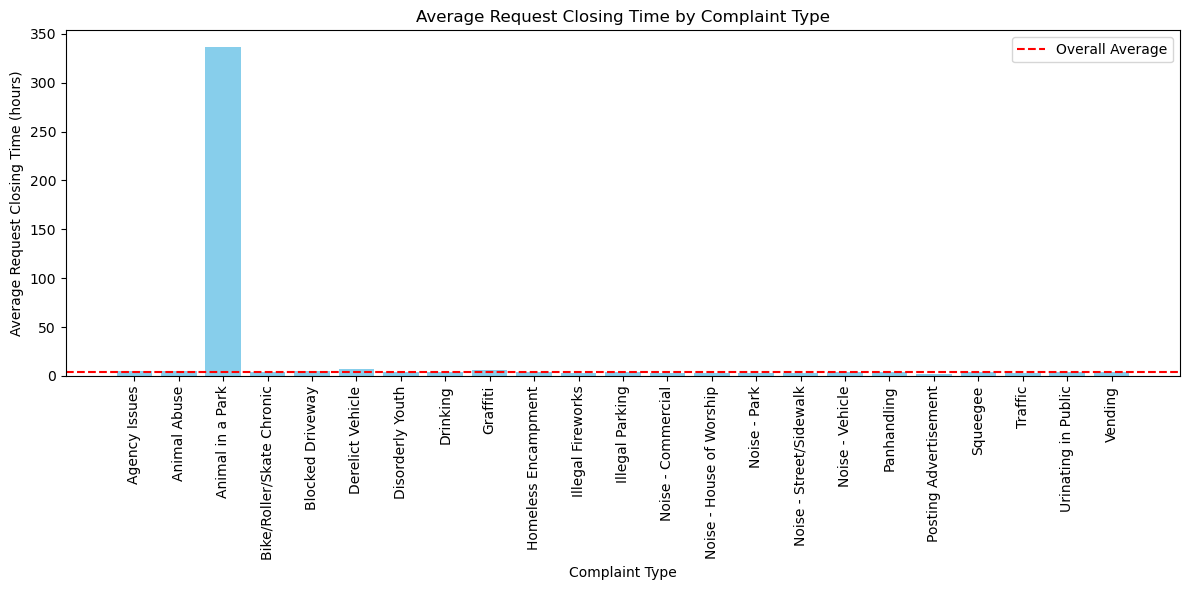

In [23]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600  # in hours

overall_average_response_time = df['Request_Closing_Time'].mean()

average_response_time_by_complaint = df.groupby('Complaint Type')['Request_Closing_Time'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_response_time_by_complaint['Complaint Type'], average_response_time_by_complaint['Request_Closing_Time'], color='skyblue')
plt.axhline(y=overall_average_response_time, color='red', linestyle='--', label='Overall Average')
plt.xlabel('Complaint Type')
plt.ylabel('Average Request Closing Time (hours)')
plt.title('Average Request Closing Time by Complaint Type')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## 6.Identify the significant variables by performing statistical analysis using p-values

To identify significant variables through statistical analysis using p-values, we can perform a statistical test such as the Analysis of Variance (ANOVA) or t-test, depending on the type of data and the specific analysis you are interested in. The p-value will help determine whether the variation observed in a specific variable is statistically significant or just due to random chance. This test is suitable when you have multiple groups (e.g., complaint types) and want to assess whether there are statistically significant differences in a continuous variable (e.g., Request_Closing_Time) across those groups.

Assumptions for ANOVA:

The samples are independent.
The data is approximately normally distributed within each group.
Homogeneity of variances (equal variance) among the groups.

In [53]:
import scipy.stats as stats

df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600  # in hours

# Perform one-way ANOVA to identify significant variables
# Here, 'Complaint Type' is the categorical variable and 'Request_Closing_Time' is the continuous variable
anova_result = stats.f_oneway(*[group['Request_Closing_Time'] for name, group in df.groupby('Complaint Type')])

# Get the p-value from the ANOVA result
p_value = anova_result.pvalue

# Print the p-value
print("P-value:", p_value)

# Check if the p-value is significant (typically < 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference among the complaint types.")
else:
    print("There is no statistically significant difference among the complaint types.")


P-value: 0.0
There is a statistically significant difference among the complaint types.


## 7. Perform a Kruskal-WallisH test

If the assumptions for performing the one-way ANOVA are not met (i.e., the data is not normally distributed or the variance is not equal among the groups), the Kruskal-Wallis test can be used as a non-parametric alternative. The Kruskal-Wallis test is suitable for analyzing continuous variables across multiple groups (complaint types) when the data is non-normally distributed.

In [54]:
# Perform Kruskal-Wallis test to identify significant variables
# Here, 'Complaint Type' is the categorical variable and 'Request_Closing_Time' is the continuous variable
kw_result = stats.kruskal(*[group['Request_Closing_Time'] for name, group in df.groupby('Complaint Type')])

# Get the p-value from the Kruskal-Wallis test result
p_value = kw_result.pvalue

# Print the p-value
print("P-value:", p_value)

# Check if the p-value is significant (typically < 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference among the complaint types.")
else:
    print("There is no statistically significant difference among the complaint types.")


P-value: 0.0
There is a statistically significant difference among the complaint types.


#### 7.1Fail to reject H0: All sample distributions are equal

 if the p-value obtained from the Kruskal-Wallis test (or any statistical test) is greater than or equal to the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis (H0). In this context, the null hypothesis states that the sample distributions (in this case, the Request_Closing_Time for each complaint type) are equal, meaning there is no statistically significant difference among the groups (complaint types).

Thus, if the p-value is not statistically significant (greater than 0.05), we do not have enough evidence to claim that the Request_Closing_Time is significantly different across different complaint types. In other words, we cannot reject the possibility that the Request_Closing_Time is the same for all complaint types based on the available data.

#### 7.2Reject H0: One or more sample distributions are not equal

If the p-value obtained from the Kruskal-Wallis test (or any statistical test) is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis (H0). In the context of the Kruskal-Wallis test, rejecting the null hypothesis means that there is sufficient evidence to suggest that at least one of the sample distributions (in this case, the Request_Closing_Time for at least one complaint type) is statistically significantly different from the others.

In simpler terms, if the p-value is statistically significant (less than 0.05), we can conclude that there is a statistically significant difference in Request_Closing_Time among different complaint types. We can then proceed with further post-hoc tests or additional analyses to identify which complaint types are significantly different from each other.